In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [ ]:
DATASET_DIR = "../data/train"

In [ ]:
os.listdir(DATASET_DIR)

['Bacteria', 'Covid', 'Normal']

"virus_images = []\nfor img_path in glob.glob(DATASET_DIR + '/virus/*'):\n    virus_images.append(mpimg.imread(img_path))\n\nfig = plt.figure()\nfig.suptitle('virus')\nplt.imshow(virus_images[0], cmap='gray') "

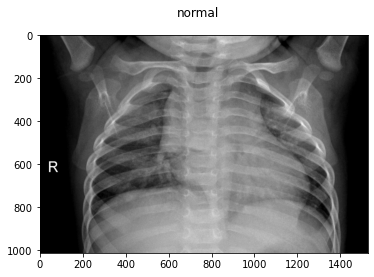

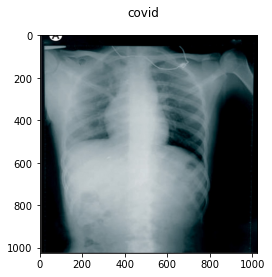

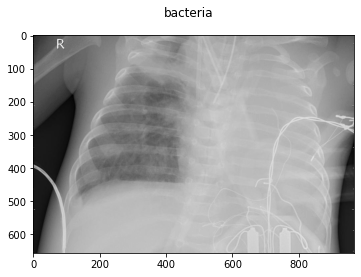

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 


bacteria_images = []
for img_path in glob.glob(DATASET_DIR + '/bacteria/*'):
    bacteria_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('bacteria')
plt.imshow(bacteria_images[0], cmap='gray') 


"""virus_images = []
for img_path in glob.glob(DATASET_DIR + '/virus/*'):
    virus_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('virus')
plt.imshow(virus_images[0], cmap='gray') """

In [ ]:
print(len(normal_images))
print(len(covid_images))
print(len(bacteria_images))
#print(len(virus_images))

1342
241
2575


In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 3
EPOCHS = 15
BATCH_SIZE = 6

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(3))
model.add(Activation("softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)       

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 2912 images belonging to 3 classes.
Found 1246 images belonging to 3 classes.
Epoch 1/15
485/485 [==============================] - 219s 451ms/step - loss: 0.8870 - accuracy: 0.6067 - val_loss: 0.8748 - val_accuracy: 0.6240
Epoch 2/15
485/485 [==============================] - 204s 421ms/step - loss: 0.6241 - accuracy: 0.7560 - val_loss: 0.3697 - val_accuracy: 0.8468
Epoch 3/15
485/485 [==============================] - 167s 345ms/step - loss: 0.4555 - accuracy: 0.8352 - val_loss: 0.6406 - val_accuracy: 0.8621
Epoch 4/15
485/485 [==============================] - 162s 335ms/step - loss: 0.3830 - accuracy: 0.8610 - val_loss: 0.3198 - val_accuracy: 0.8226
Epoch 5/15
485/485 [==============================] - 165s 340ms/step - loss: 0.3612 - accuracy: 0.8827 - val_loss: 0.2714 - val_accuracy: 0.8258
Epoch 6/15
485/485 [==============================] - 159s 329ms/step - loss: 0.3421 - accuracy: 0.8889 - val_loss: 0.1058 - val_accuracy: 0.8629
Epoch 7/15
485/485 [====================

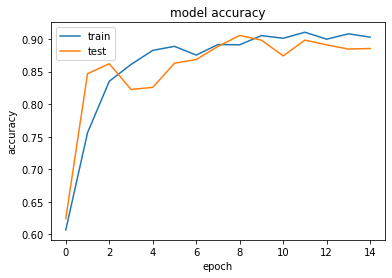

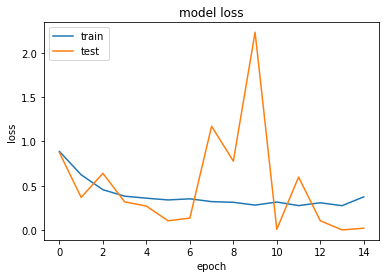

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9029594
validation_accuracy 0.8854838609695435


In [ ]:
label = validation_generator.classes

In [ ]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]


In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[666,  18,  10],
       [  7,  47,   6],
       [ 99,   7, 386]], dtype=int64)

In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,2,All
Actual,,,,
0,666,7,99,772
1,18,47,7,72
2,10,6,386,402
All,694,60,492,1246


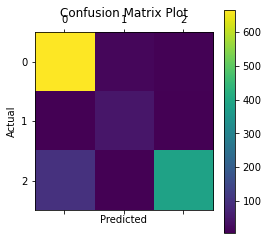

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

Epoch 1/5
20000/20000 [==============================] - 1s 31us/step - loss: 0.3985 - accuracy: 0.8325
Epoch 2/5
20000/20000 [==============================] - 0s 12us/step - loss: 0.2933 - accuracy: 0.8823
Epoch 3/5
20000/20000 [==============================] - 0s 12us/step - loss: 0.2791 - accuracy: 0.8912
Epoch 4/5
20000/20000 [==============================] - 0s 11us/step - loss: 0.2686 - accuracy: 0.8977
Epoch 5/5
20000/20000 [==============================] - 0s 11us/step - loss: 0.2622 - accuracy: 0.9018


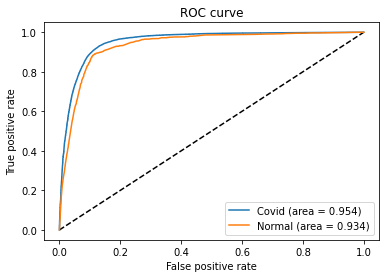

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Covid (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='Normal (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
